----------Results---------
Number of Iterations: 9
Final Parameters i.e. Theta values
Theta[0] [0.40125316]
Theta[1] [2.5885477]
Theta[2] [-2.72558849]
Stopping Criteria: Loss < ep) ep= 1.1e-15
----------------------------------


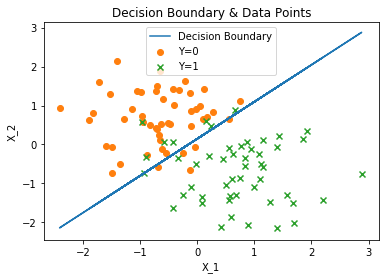

In [6]:
'''
************************************************
** COL774 Machine Learning
** Assignment 1
** Question 3: Logistic Regression & Newton's Method
** @Author: Aman Bhardwaj
** @Entry No. 2019SIY7580
** @Date: 6 Feb 2020
************************************************
'''

import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import time


'''Normalize array data'''
def normalize(x):
    mean = np.mean(x)
    stanDev = np.std(x)
    #print(mean, stanDev)
    for i in range(len(x)):
        x[i] = (x[i] - mean) / stanDev
    return x

#Load Data
x = pa.read_csv("logisticX.csv", names=["X_1", "X_2"])
y = pa.read_csv("logisticY.csv", names=["Y"])

#Normalize data
x['X_1'] = normalize(x['X_1'])
x['X_2'] = normalize(x['X_2'])

x = np.c_[np.ones(100), x]
x = pa.DataFrame(x)
x = x.rename(columns={0: "X_0", 1: "X_1", 2: "X_2"})
theta = np.zeros((3,1))

'''
#Calculate Sigmoid Function
#Param th: Theta parameters
#x: input features
'''
def sigmoid(th, x):
    n = np.dot(x, th)
    return (1/(1+ np.exp(-n)))

'''
#Calculate First order derivative wrt Theta
#Param th: Theta parameters
#x: input features
#y: labels
'''
def calcDelJTheta(th, x, y):
    return np.dot(x.T, (y - sigmoid(th, x)))

'''
#Hessian Matrix
#Calculate Second Order Derivative
#Param th: Theta parameters
#x: input features
'''
def calcDel2JTheta(th, x):
    xMat = np.dot(x.T, x)
    delSig = sigmoid(th, x)* (sigmoid(th, x)-1)
    delSig = np.array(delSig.T)
    return x.T @ np.diag(delSig[0]) @ x

'''
#Implementation 
#Param th: Theta parameters
#x: input features
'''
def runNewtonOptimization(th, x, y, maxIterations, ep):
    converge = False
    count = 0
    while not converge and count != maxIterations:
        hInv = np.linalg.inv(calcDel2JTheta(th, x))
        delJTheta = calcDelJTheta(th, x, y)
        th -= np.dot(hInv, delJTheta)
        stop = abs(delJTheta[2]) < 1.1e-15
        if stop[0]:
            converge = True
        count +=1
    return th, count

'''Print The Results'''
def reportResults(i, th, ep):
    print("----------Results---------")
    print("Number of Iterations:", i)    
    print("Final Parameters i.e. Theta values")
    print("Theta[0]",th[0])
    print("Theta[1]",th[1]) 
    print("Theta[2]",th[2])
    print("Stopping Criteria: Loss < ep) ep=",ep)
    print("----------------------------------")

'''Plot Decision Boundary'''
def plotHypothesis(x, y, th):    
    hypo = np.dot(x , th)
    fig = plt.figure(1)
    
    plt.scatter(x["X_1"][:50],x["X_2"][:50], marker='o', c='tab:orange', label="Y=0")
    plt.scatter(x["X_1"][50:],x["X_2"][50:], marker='x', c='tab:green', label="Y=1")
    
    x2 = -1*((th[1]/th[2])*x["X_1"] + (th[0]/th[2]))
    plt.plot(x["X_1"], x2, label='Decision Boundary')
    plt.ylabel("X_2")
    plt.xlabel("X_1")
    plt.title("Decision Boundary & Data Points")
    
    plt.legend()
    plt.show()
    #fig.savefig("plots/q3_b_decision_boundry.png", dpi= 300, pad_inches=0.1, format='png')
    
if __name__ == '__main__':
    #------------Q3.a-------------#
    maxItr = 100
    ep =  1.1e-15
    thFinal, itr = runNewtonOptimization(theta, x, y, maxItr, ep)
    reportResults(itr, thFinal, ep)
    
    #------------Q3.b-------------#
    plotHypothesis(x, y, thFinal)